## `Let us visualize the number of elements in each class of mobile phones.`

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px


In [2]:
train_df = pd.read_pickle('../data/processed/1_preprocessed_df.pkl')
train_df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### `Non-numerical univariate plots`

C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\765761759.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_countplot = sns.countplot(data=train_df, x= column, palette=pastel_colors, ax=axes[i, 0])
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\765761759.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax_countplot = sns.countplot(data=train_df, x= column, palette=pastel_colors, ax=axes[i, 0])
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\765761759.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_countplot = sns.countplot(data=train_df, x= column, palette=pastel_colors, ax=axes[i, 0])
C:\Users\Mohamed Essam\AppData

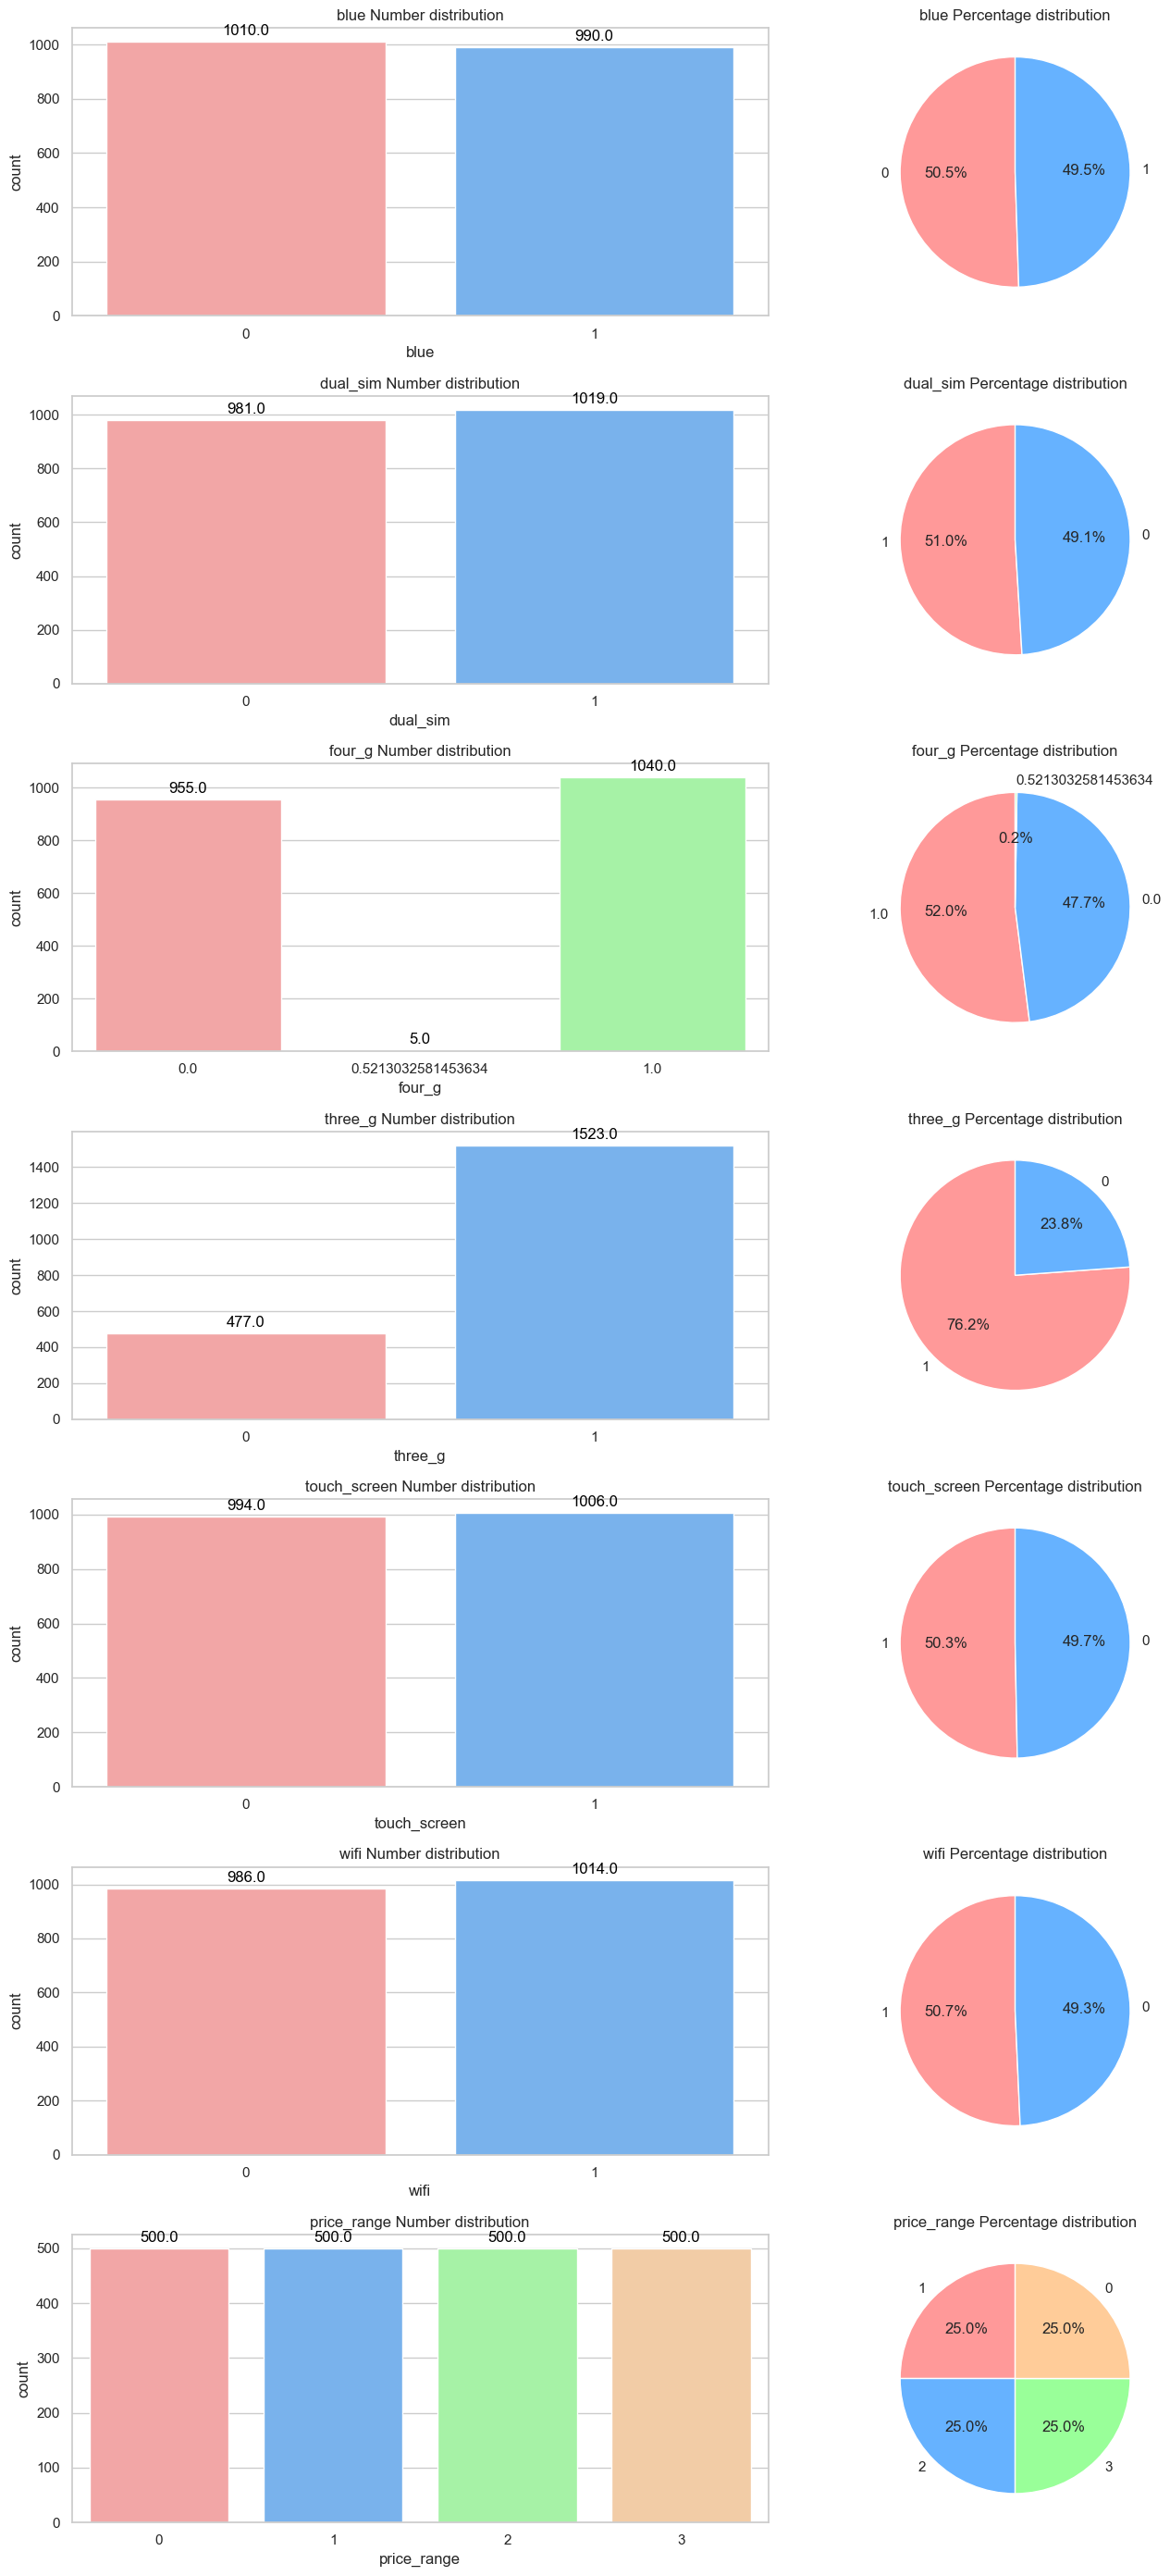

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the categorical variables
categorical_variables = ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Color
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Create subplots
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(15, 4 * len(categorical_variables)))

# Loop over each row and plot a countplot and a pie chart
for i, column in enumerate(categorical_variables):
    # calc num of occurance for each category
    category_counts = train_df[column].value_counts()

    # plot countplot
    ax_countplot = sns.countplot(data=train_df, x= column, palette=pastel_colors, ax=axes[i, 0])
    ax_countplot.set_title(f"{column} Number distribution")

    # Add labels to countplot
    for p in ax_countplot.patches:
        ax_countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                              textcoords='offset points')
    
    # plot pie chart
    ax_pie = axes[i, 1]
    ax_pie.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
    ax_pie.set_title(f"{column} Percentage distribution")

plt.tight_layout()
plt.show()

`What is clear in these charts, except for the "three_g" column, in the rest of the columns, the distribution of category variables, which are almost identical to the samples in the categories.`

#### `Numerical univariate plots`

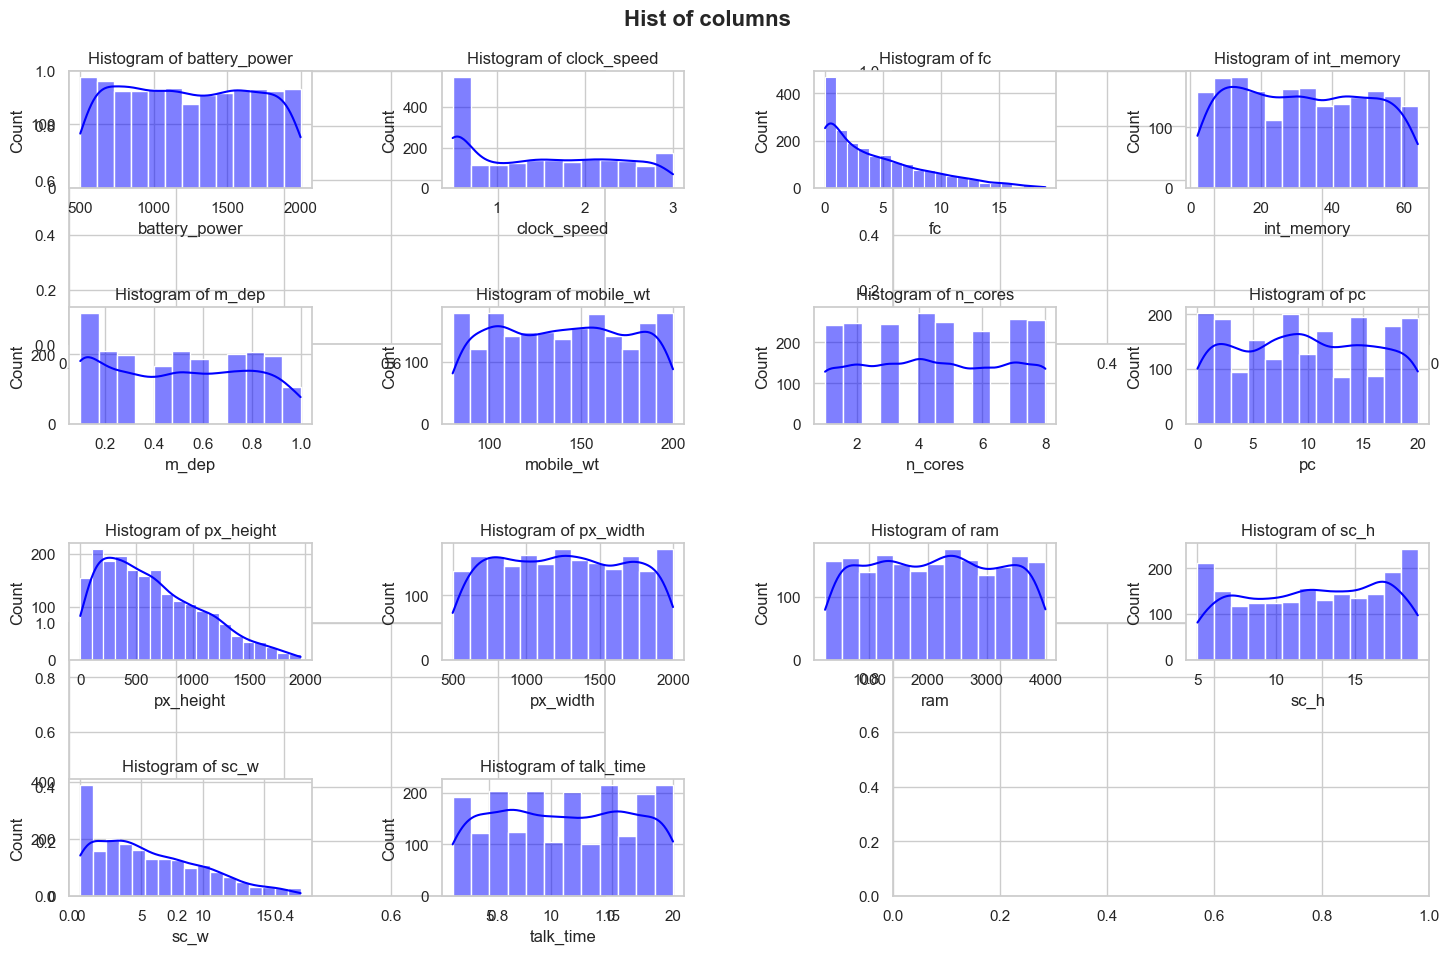

In [5]:
fig, axes = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
fig.suptitle('Hist of columns', fontsize=16, fontweight='bold')

columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for idx, col in enumerate(columns, 1):
    plt.subplot(4, 4, idx)
    sns.histplot(data=train_df, kde=True, x=col, color='blue')
    plt.title(f'Histogram of {col}')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

`Except for the three columns "fc" and "sc-w" and "px_height" the distribution of different values in other features has been almost uniform
In the third column, we see a normal distribution that tends to the left`

#### `Numeric-category diagrams of two variables`

C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3896517556.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3896517556.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3896517556.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column, y=col, d

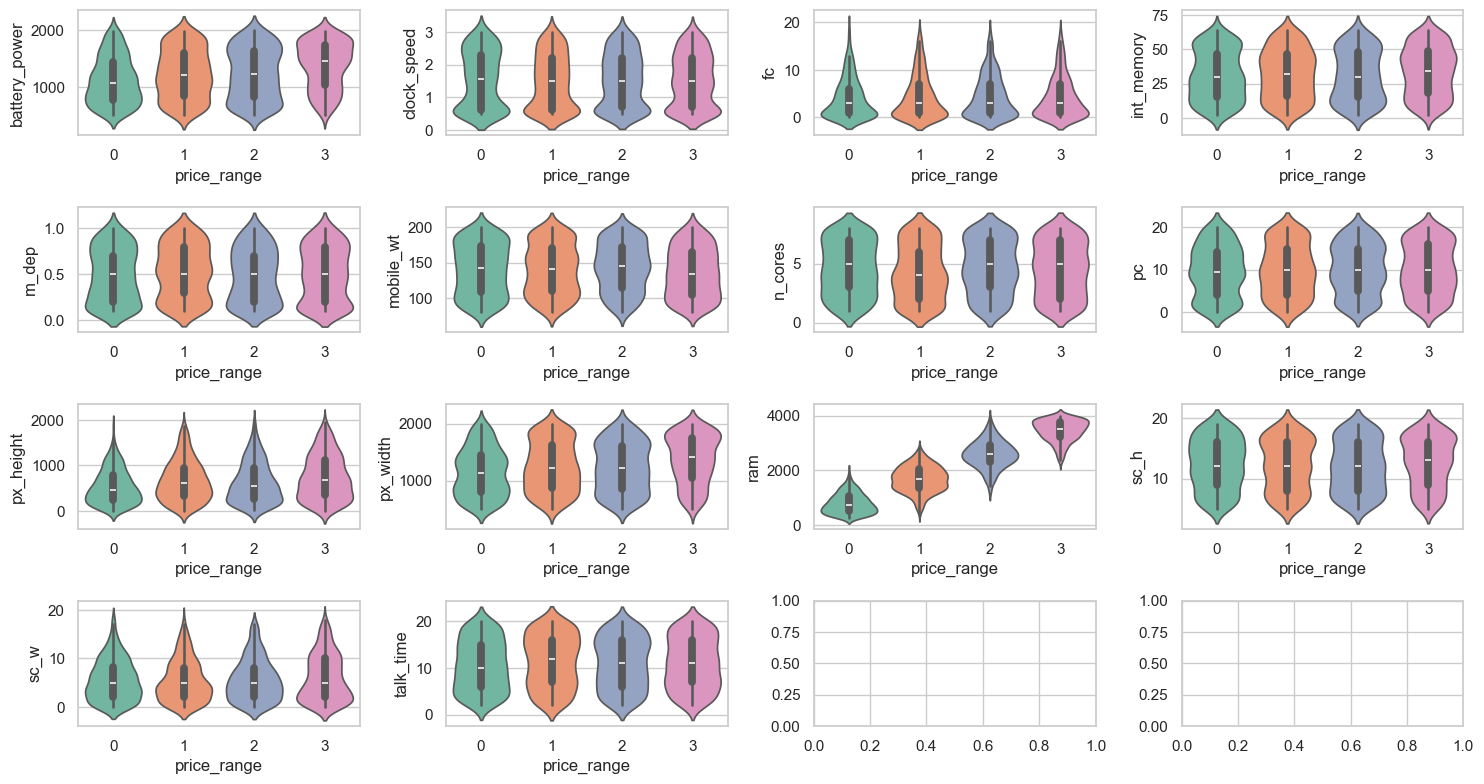

In [6]:
numeric_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt','n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time' ]
target_column = 'price_range'

# create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 8))
# Loop through numric columns and plot violiplots
for i, col in enumerate(numeric_columns):
    sns.violinplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
# Adjust layout
plt.tight_layout()
plt.show()  

C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\795782878.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\795782878.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\795782878.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\795782878.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
C:\Users\Mohamed Essam\A

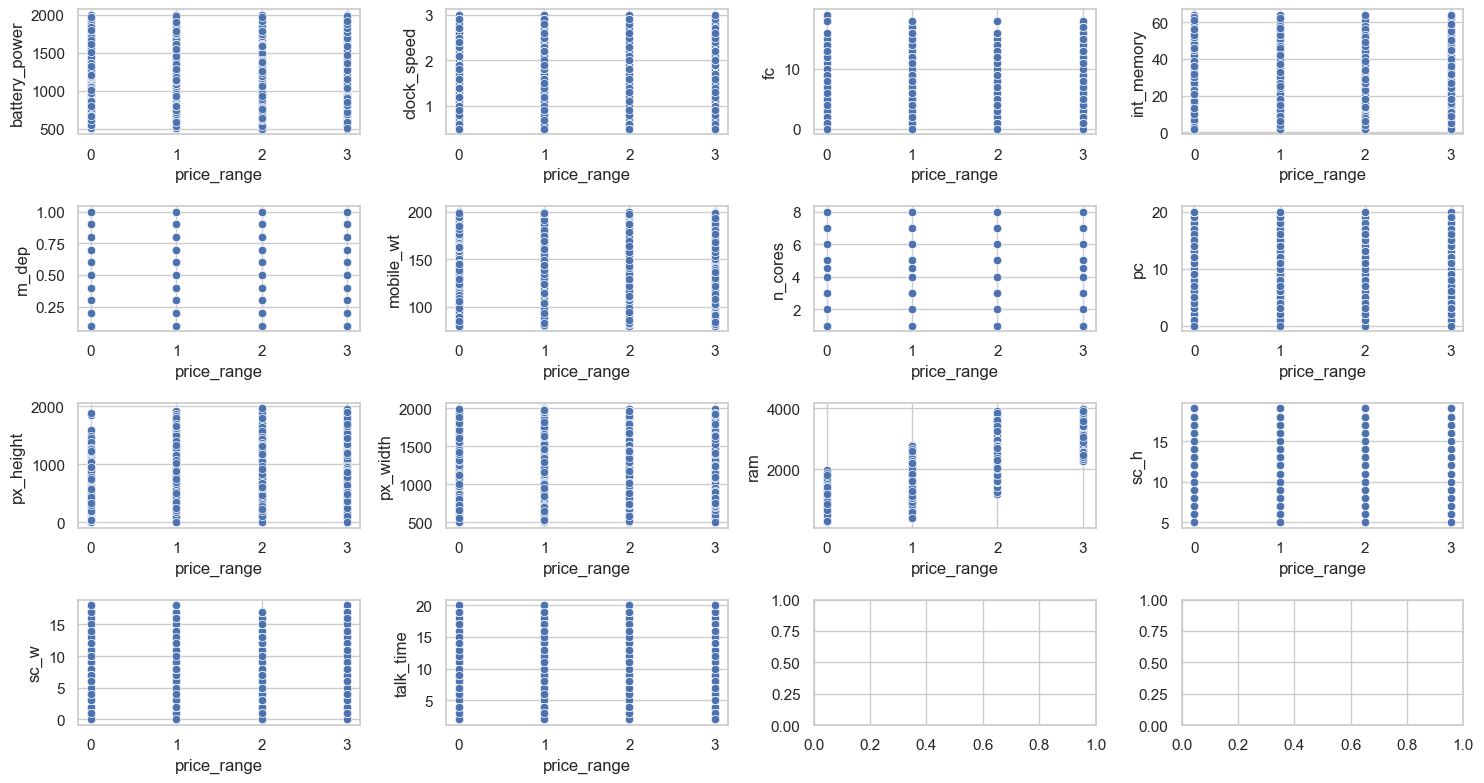

In [7]:
numeric_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt','n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time' ]
target_column = 'price_range'

# create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 8))
# Loop through numric columns and plot violiplots
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=target_column, y=col, data=train_df, ax=axes[i//4, i%4], palette='Set2')
# Adjust layout
plt.tight_layout()
plt.show()  

`In the graphs above, it shows the dispersion and relationships between the variables in relation to the "prece_range" column. The dispersion in all categories of the "prece_range" column is almost the same, except for the "fc" and "px_height" and "sc_w" columns, which are in the values Below average has the most scatter in categories, and the "ram" column covers the scatter with increasing amount of RAM in a category.`

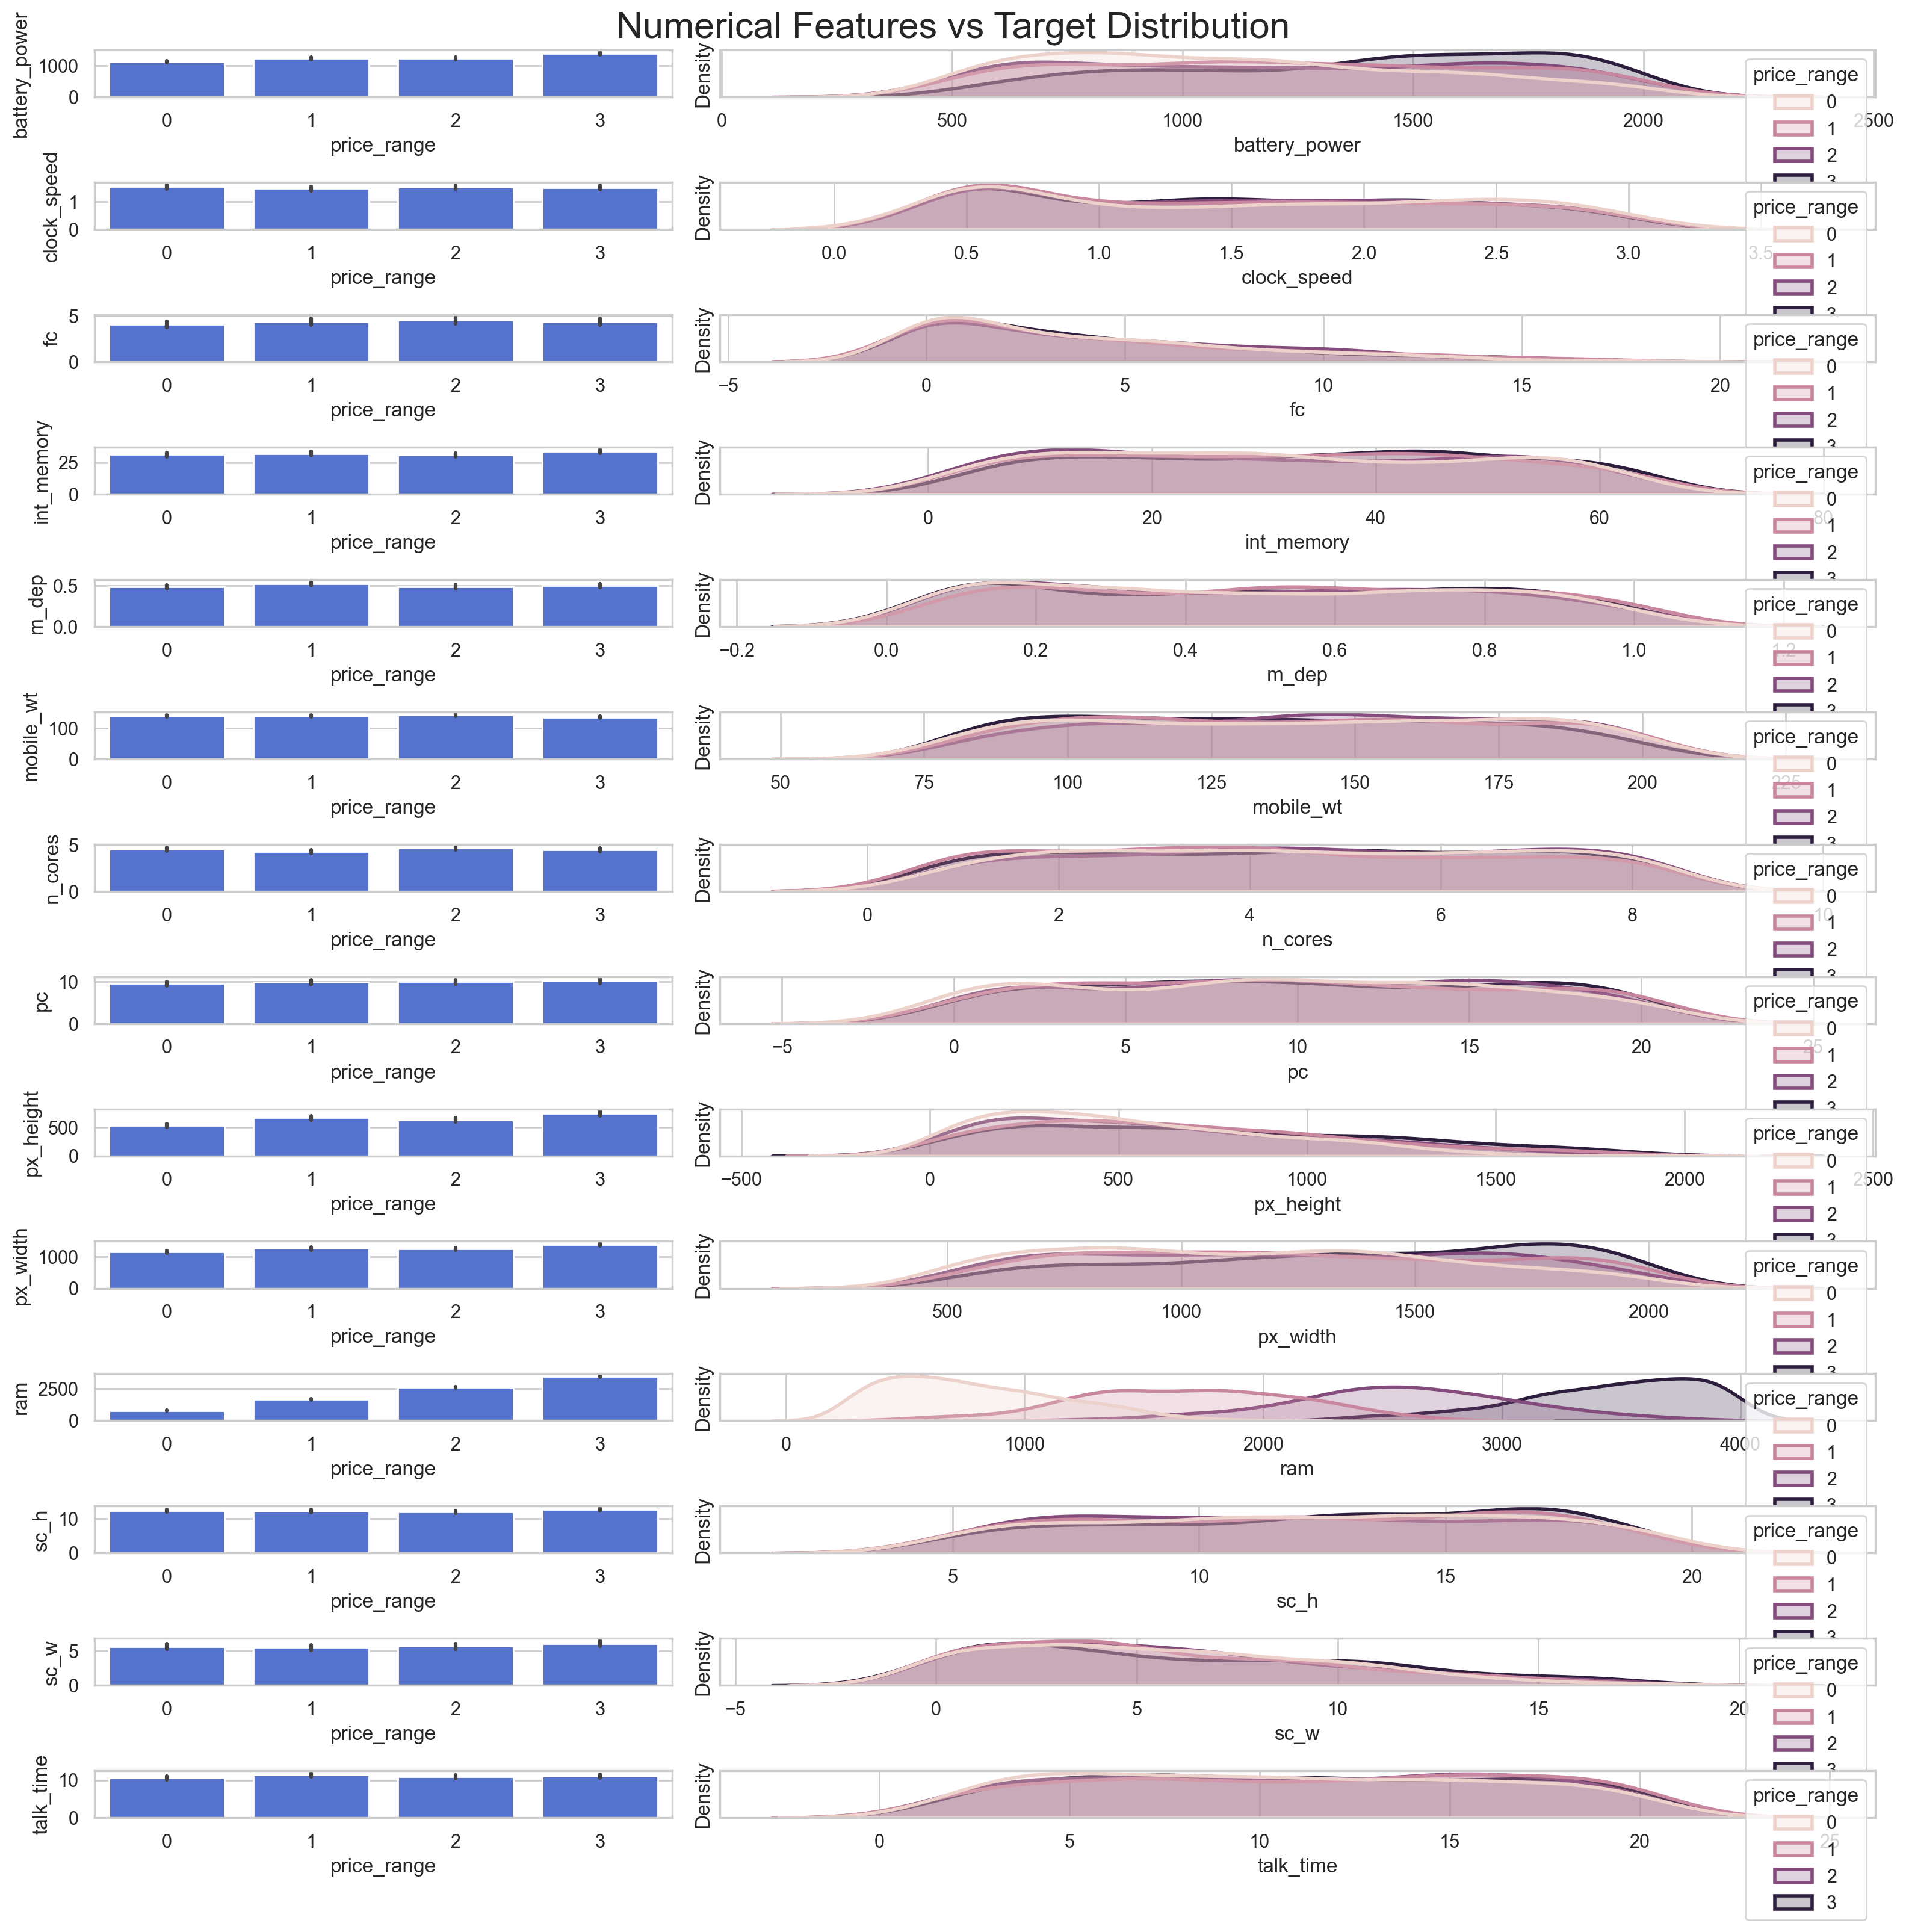

In [15]:

Num_Features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Target = 'price_range'

sns.set_palette(['royalblue', 'darkturquoise'])
fig, ax = plt.subplots(14, 2, figsize=(16,16), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=train_df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=train_df, x=col, fill=True, linewidth=2, ax=ax[i, 1], hue=Target)
    ax[i, 1].set_yticks([])
    
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

Barplot: In the first column, a bar graph is shown for each numerical variable relative to the target variable. This bar graph shows the average or total values of numerical variables based on different categories of the target variable. Except for "ram"other features, you have almost the same value of the average in different categories"price_range"</p>

Kernel Density Estimation (KDE) Plot: In the second column, four KDE graphs are drawn for each numerical variable. These graphs show the probability density distribution for different values of the numerical variables in each category of the target variable.</p>
The probability density distribution for the respective features is almost uniform except in the "ram" columns.

#### `Numerical-Numerical plots of two variable`

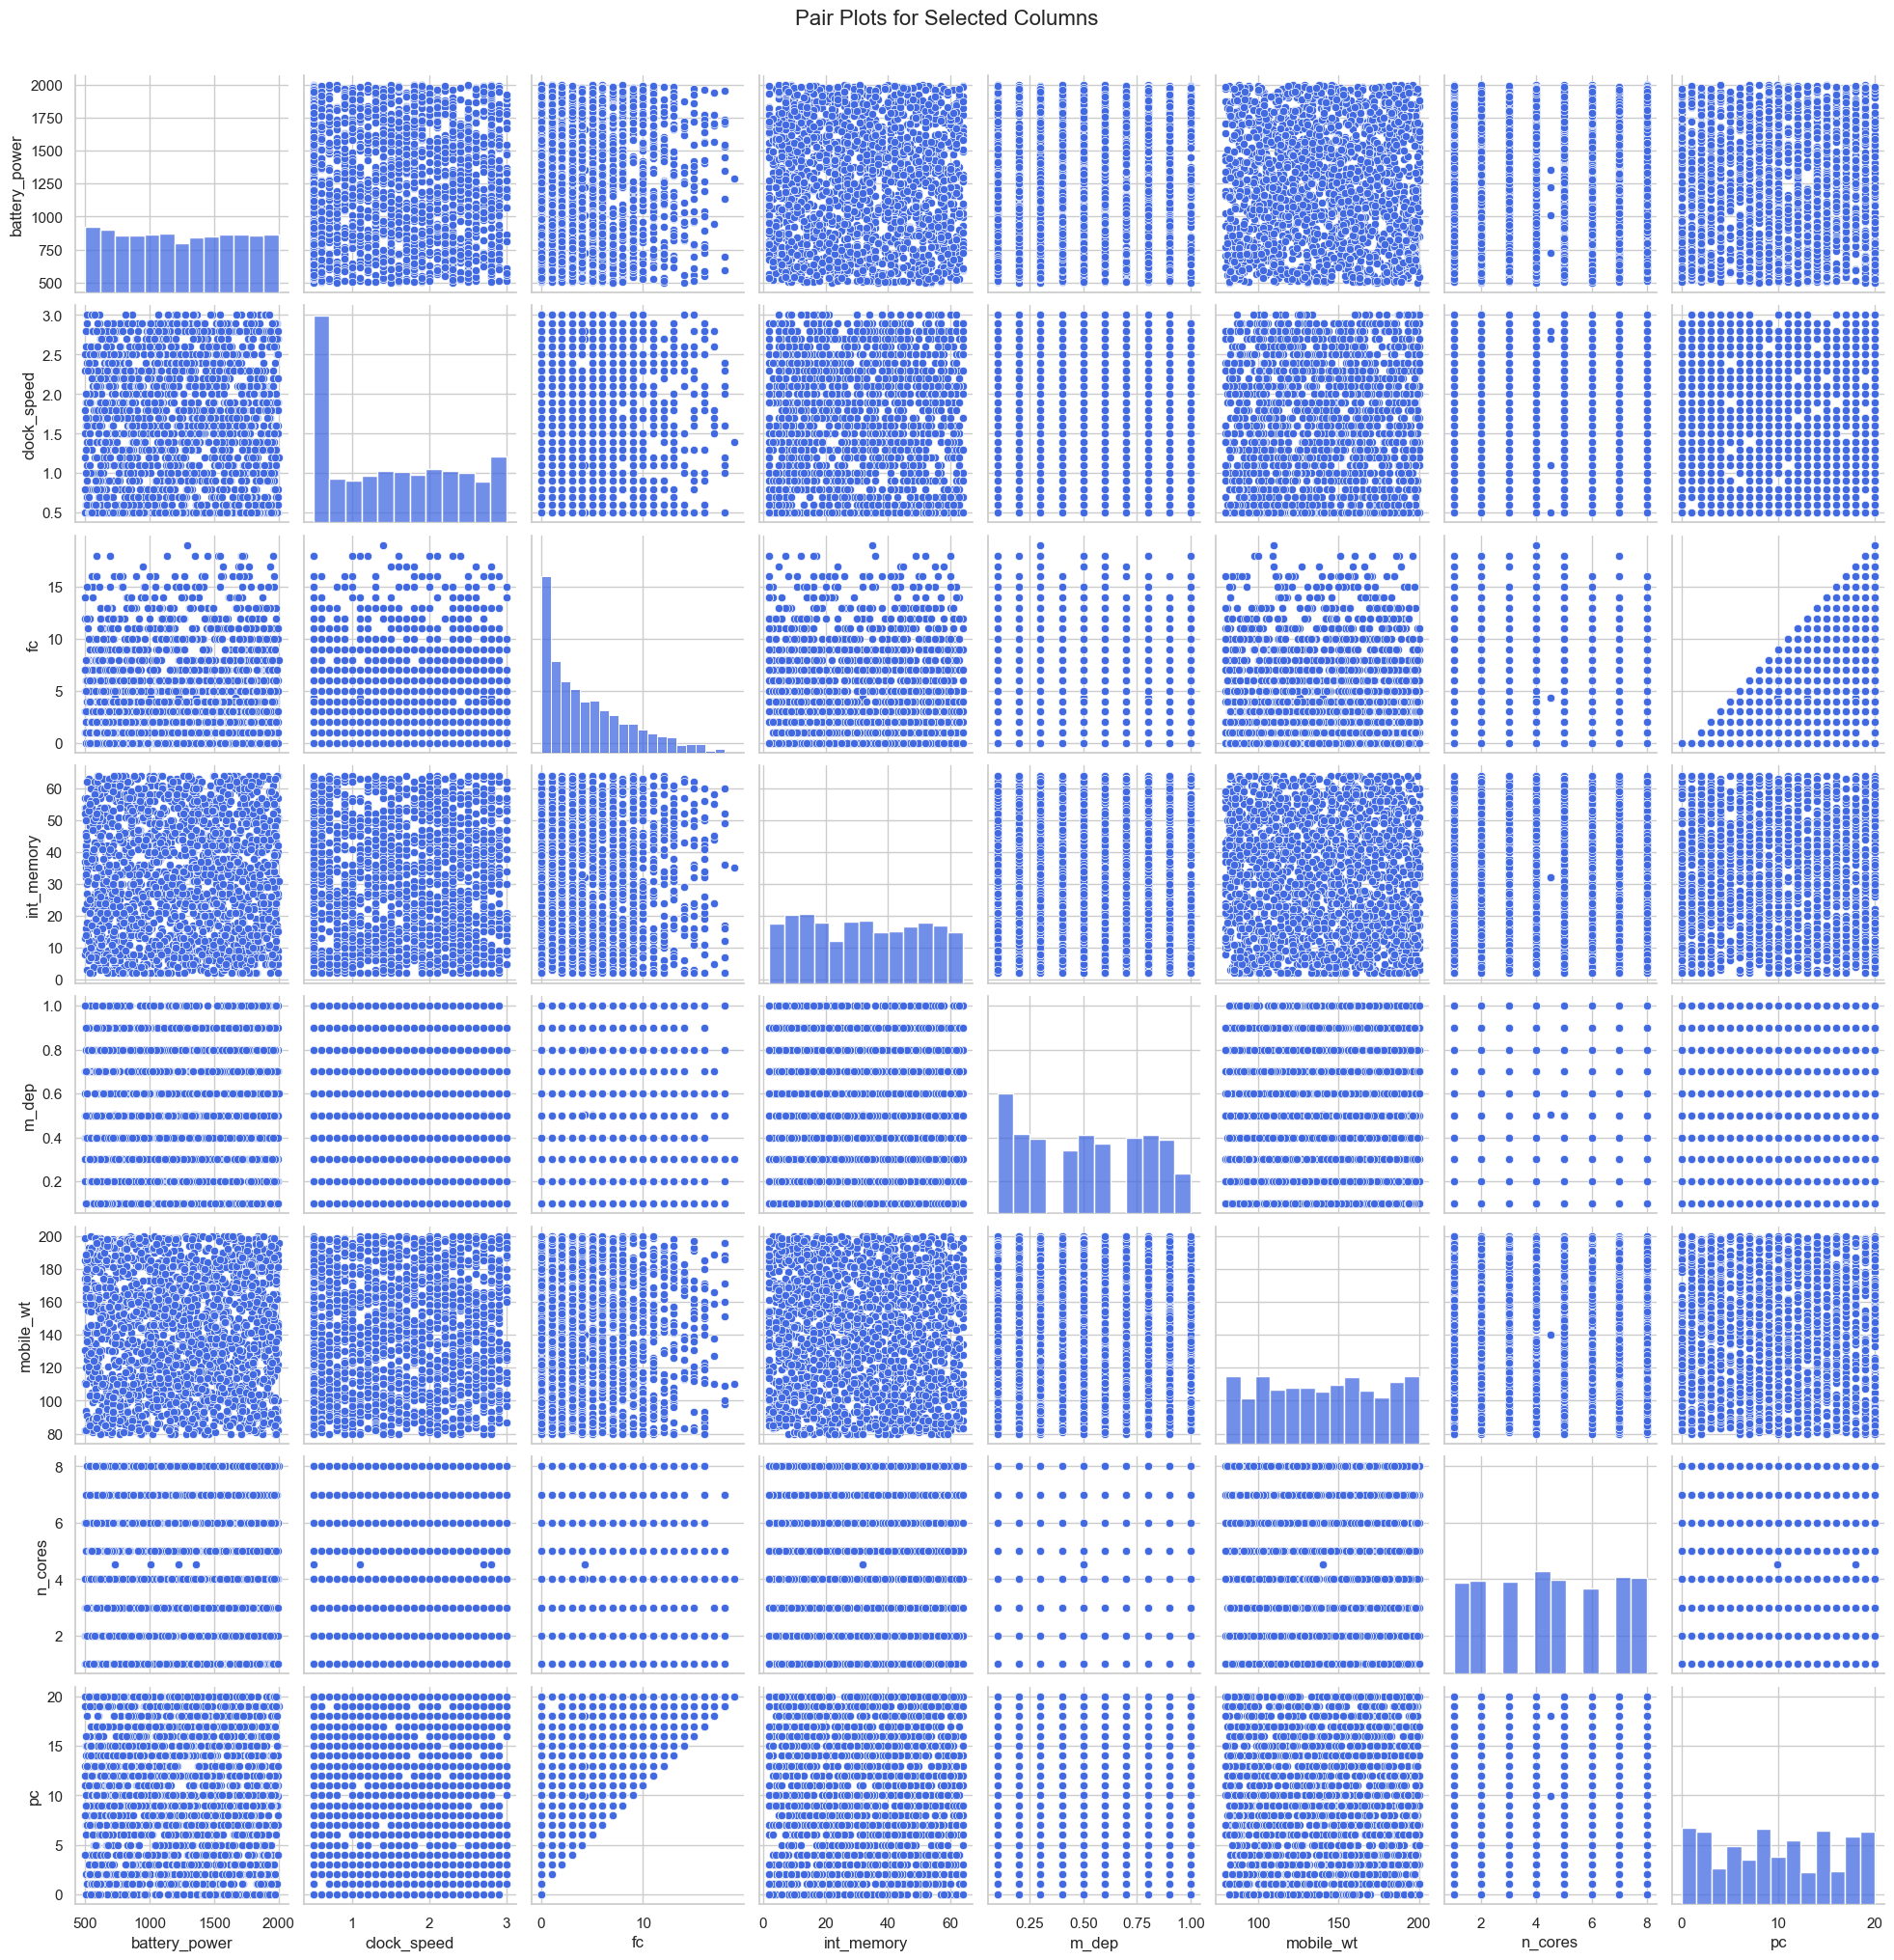

In [16]:
#pairplot
selected_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc']

# Creating a DataFrame with the selected columns
df_selected = train_df[selected_columns]

# Adding a scatterplot matrix
sns.pairplot(df_selected, height=2.5)
plt.suptitle('Pair Plots for Selected Columns', y=1.02, fontsize=16)
plt.show()


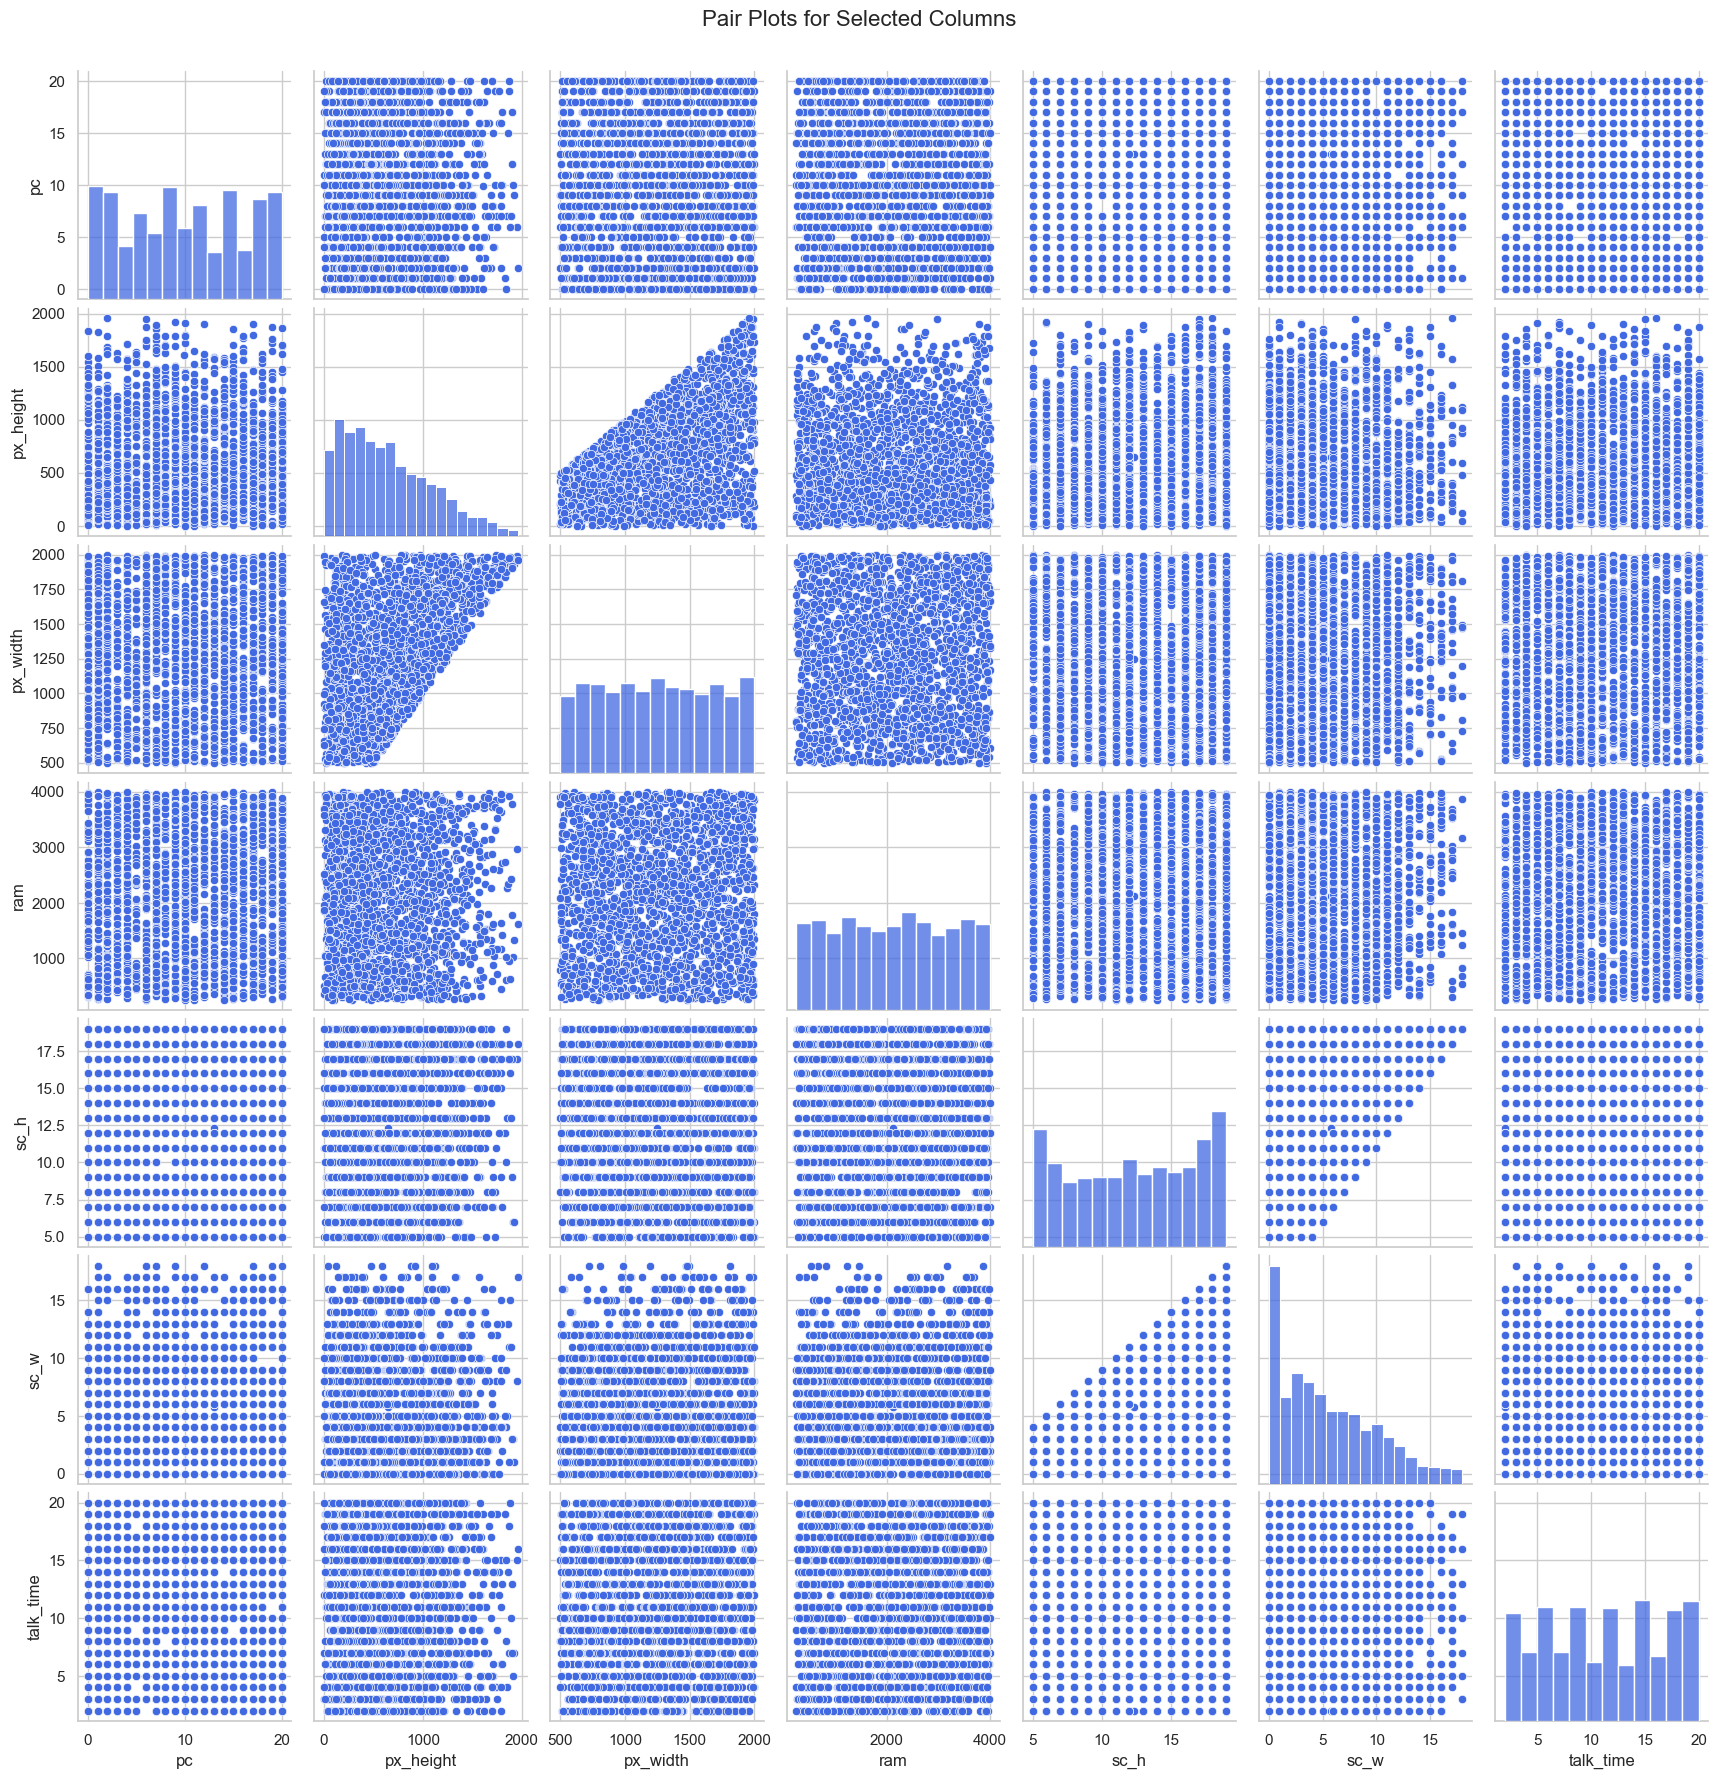

In [18]:
#pairplot
selected_columns = [ 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Creating a DataFrame with the selected columns
df_selected = train_df[selected_columns]

# Adding a scatterplot matrix
sns.pairplot(df_selected, height=2.5)
plt.suptitle('Pair Plots for Selected Columns', y=1.02, fontsize=16)
plt.show()


The graphs above show the distribution of each of the numerical characteristics relative to each other, some of which have a relationship with each other and some of which do not have any particular pattern.</p>
    
    Column "pc" with "fc" and column "sc-w" with "sc-h" and "px_height" with "px_width" have a linear relationship in the sense that if one of the values increases, the other increases and vice versa.

#### `category-category diagrams of two variables`

C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3358892546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y=target_column, data=train_df, palette='Set2', inner='quartile')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3358892546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y=target_column, data=train_df, palette='Set2', inner='quartile')
C:\Users\Mohamed Essam\AppData\Local\Temp\ipykernel_21820\3358892546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y=target_column, da

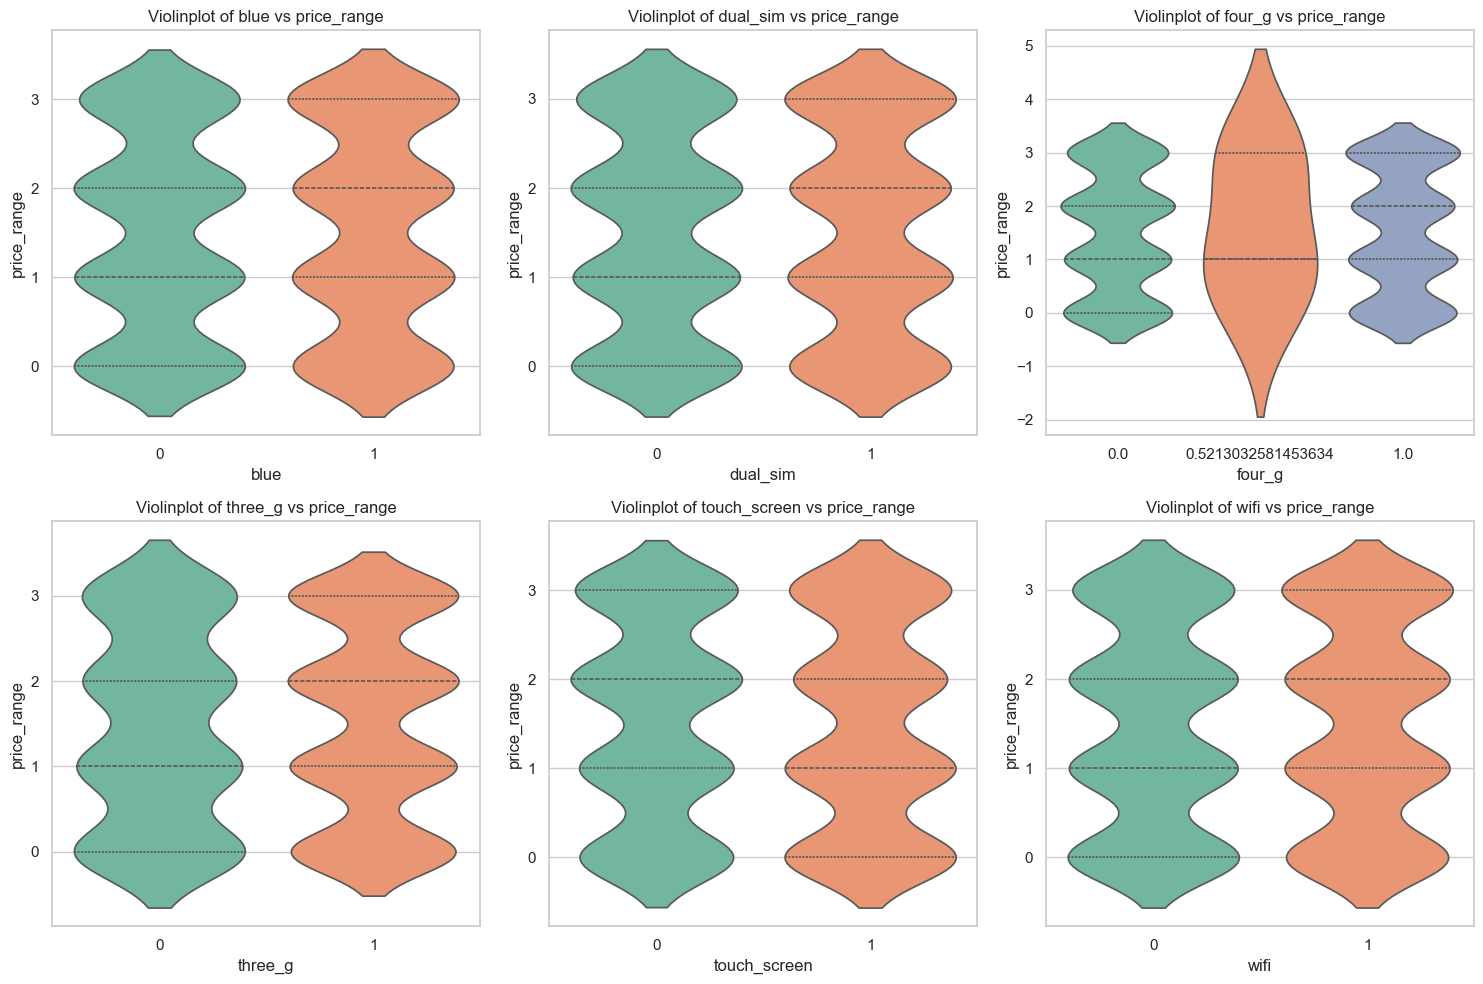

In [19]:

categorical_columns =  ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
target_column = 'price_range'

# Set chart size
plt.figure(figsize=(15, 10))

# Arrangement of charts
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=col, y=target_column, data=train_df, palette='Set2', inner='quartile')
    plt.title(f'Violinplot of {col} vs {target_column}')

plt.tight_layout()
plt.show()


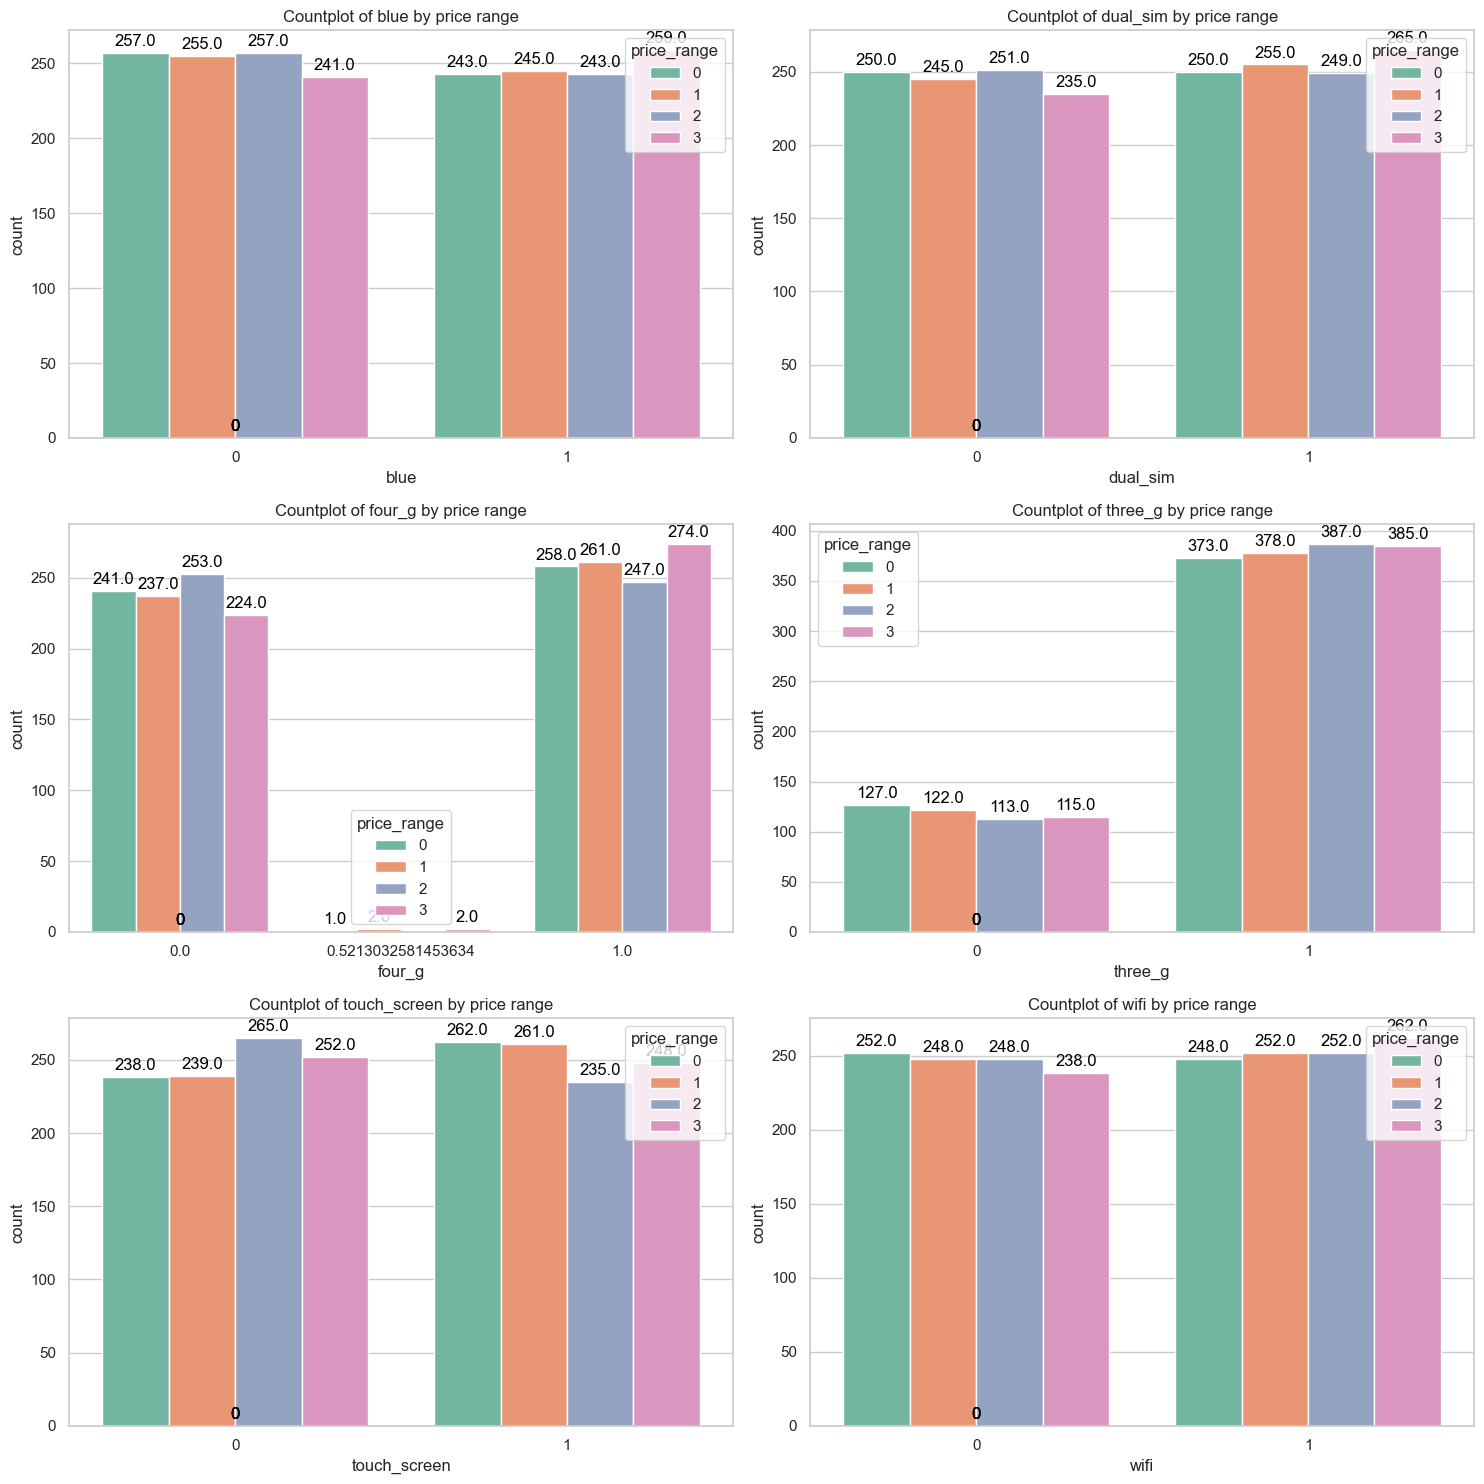

In [20]:

categorical_columns = ['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Set chart size
plt.figure(figsize=(15, 15))

# Arrangement of charts
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    ax_countplot  =sns.countplot(data=train_df, x=col, hue='price_range', palette='Set2')
    plt.title(f'Countplot of {col} by price range')
    
    for p in ax_countplot.patches:
        ax_countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                              textcoords='offset points')

plt.tight_layout()
plt.show()


In the above graphs, the distribution of Boolean values in "tree_g" is shown.<p>

#### `Heatmap plots`

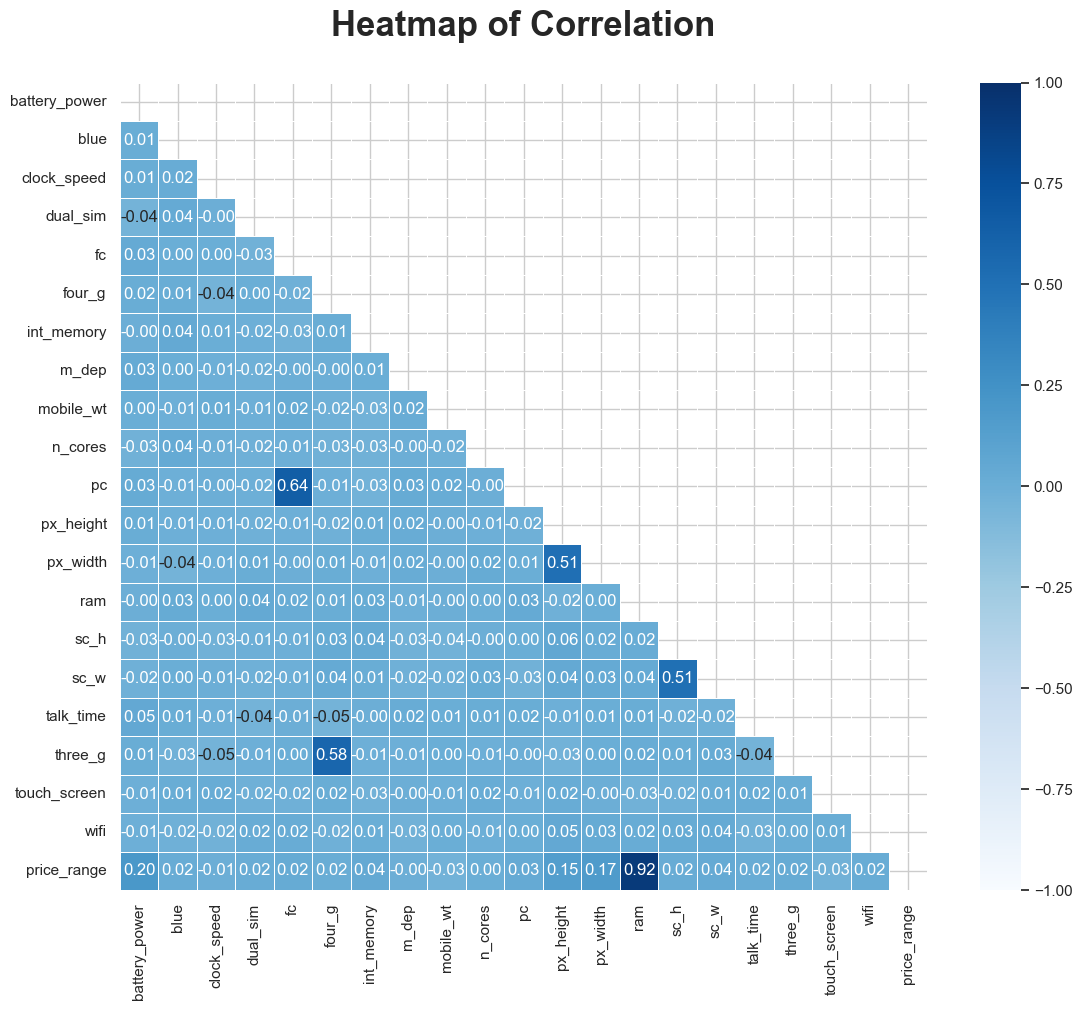

In [21]:

# Calculate correlation matrix
corr_matrix = train_df.select_dtypes(['float64', 'int64' ]).corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, linewidths=.5, square=True)

plt.title('Heatmap of Correlation\n', fontsize=25, fontweight='bold')

plt.tight_layout()
plt.show()


The highest correlation with the target is related to the variable "ram" which has 0.92 respectively to "battery_power" and "px_height" and "px_width" with the value of 0.20 and 0.15 and 0.17<p>